# Linear Regression


In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

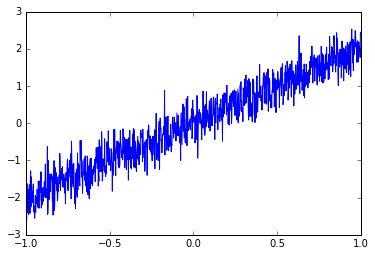

In [17]:
X_tr = np.linspace(-1, 1, 101)

# create a y value which is approximately linear but with some random noise
y_tr = 2 * X_tr + np.random.randn(*X_tr.shape) * 0.33

plt.plot(X_tr,y_tr)

In [18]:
# create symbolic variables
X = tf.placeholder("float") 
y = tf.placeholder("float")

# create a shared variable (like theano.shared) for the weight matrix
w = tf.Variable(0.0, name="weights") 

def model(X, w):
    return tf.mul(X, w) # lr is just X*w so this model line is pretty simple

In [19]:
y_model = tf.mul(X, w)

# use sqr error for cost function
cost = (tf.pow(y-y_model, 2)) 
# construct an optimizer to minimize cost and fit line to my data
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost) 

In [20]:
sess = tf.Session()
init = tf.initialize_all_variables() # you need to initialize variables (in this case just variable W)
sess.run(init)

for i in range(100):
    for (xi, yi) in zip(X_tr, y_tr): 
        sess.run(train_op, feed_dict={X: xi, y: yi})

print(sess.run(w))  # something around 2

2.03802
